# Imports

In [114]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.datasets import mnist

# Data

In [43]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [44]:
X_train.shape

(60000, 28, 28)

In [45]:
example_img = X_train[0]

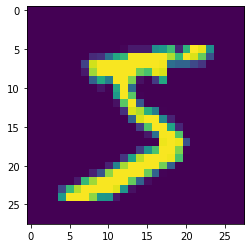

In [46]:
plt.imshow(example_img)

In [47]:
y_train[0]

5

In [48]:
y_train.shape

(60000,)

## Turn the label data into categorical one hot vectors

In [49]:
from tensorflow.keras.utils import to_categorical

In [50]:
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

## Normalize data

Scaling values from 0 - 255 to 0 - 1

In [51]:
print(example_img.max())
print(example_img.min())

255
0


In [52]:
# scaling
X_train = X_train/255
X_test = X_test/255

In [53]:
scaled_img = X_train[0]

In [54]:
print(scaled_img.max())
print(scaled_img.min())

1.0
0.0


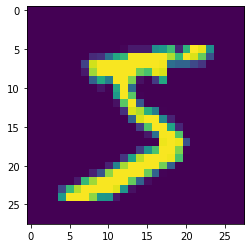

In [55]:
plt.imshow(scaled_img)

## Reshape the data
Shape is currently (60000, 28, 28)\
We wany to reshape this to (60000, 28, 28, 1) to represent it as (batch_size, width, height, color_channels)

In [56]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [57]:
# reshaping
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [58]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# The Model

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

## Model Structure
I have commented what needs to stay set\
We can play around with number of Conv and pooling layers as well as filters, kernel_size and padding\
We can add as many Dense layers as we want after flattening as well as number of neurons in that dense layer.

In [64]:
model = Sequential()

# convulutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1,1), padding='valid',
                 input_shape=(28,28,1), activation='relu'))  # this input shape should be set by data (not changed)
# pooling layer 
model.add(MaxPool2D(pool_size=(2,2)))

# I will add another set of convultional and pooling layers to test its effect
model.add(Conv2D(filters=64, kernel_size=(4,4), strides=(1,1), padding='valid',
                 input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# flatten image
model.add(Flatten())  # This must be done somewhere in the model

# Dense Layers
model.add(Dense(256, activation='relu'))

# output layer
model.add(Dense(10, activation='softmax')) # this output shape should be set by data (not changed)

# put the model layers together
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training
**I will setup early stopping callback so we don't have to worry about number of epochs**

In [66]:
# early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [67]:
# fit the model
model.fit(X_train, y_train_cat, epochs=10, validation_data=(X_test, y_test_cat),
          callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.1182 - accuracy: 0.9639 - val_loss: 0.0420 - val_accuracy: 0.9863
Epoch 2/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0389 - accuracy: 0.9884 - val_loss: 0.0321 - val_accuracy: 0.9895
Epoch 3/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0270 - accuracy: 0.9914 - val_loss: 0.0283 - val_accuracy: 0.9905
Epoch 4/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0200 - accuracy: 0.9936 - val_loss: 0.0282 - val_accuracy: 0.9913
Epoch 5/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0157 - accuracy: 0.9947 - val_loss: 0.0307 - val_accuracy: 0.9906


# Evaluating model

In [69]:
metrics = pd.DataFrame(model.history.history)

In [70]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.118241,0.963850,0.042016,0.9863
1,0.038872,0.988450,0.032066,0.9895
2,0.026973,0.991433,0.028259,0.9905
3,0.020041,0.993633,0.028160,0.9913
4,0.015704,0.994717,0.030731,0.9906


In [73]:
model.metrics_names

['loss', 'accuracy']

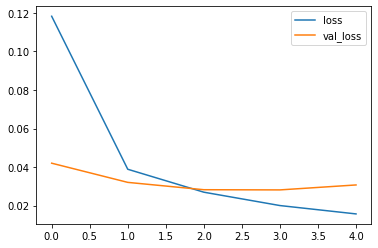

In [71]:
metrics[['loss', 'val_loss']].plot()

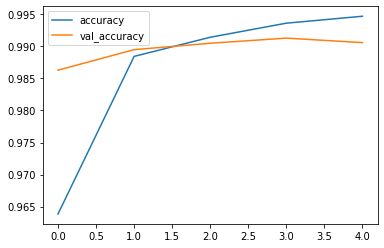

In [72]:
metrics[['accuracy', 'val_accuracy']].plot()

In [74]:
model.evaluate(X_test, y_test_cat)

313/313 [==============================] - 4s 12ms/step - loss: 0.0307 - accuracy: 0.9906


[0.03073136880993843, 0.9905999898910522]

## Classification report and confusion matrix

In [75]:
from sklearn.metrics import classification_report, confusion_matrix

In [77]:
predictions = np.argmax(model.predict(X_test), axis=-1)

313/313 [==============================] - 4s 11ms/step


In [79]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [80]:
confusion_matrix(y_test, predictions)

array([[ 976,    0,    1,    0,    0,    0,    1,    1,    1,    0],
       [   0, 1119,    3,    1,    0,    2,    5,    3,    2,    0],
       [   0,    0, 1031,    0,    0,    0,    0,    1,    0,    0],
       [   0,    0,    2, 1003,    0,    5,    0,    0,    0,    0],
       [   0,    0,    0,    0,  979,    0,    1,    0,    0,    2],
       [   2,    0,    0,    4,    0,  885,    1,    0,    0,    0],
       [   2,    1,    1,    0,    1,    1,  952,    0,    0,    0],
       [   0,    1,    8,    0,    1,    0,    0, 1016,    0,    2],
       [   2,    0,    4,    1,    1,    2,    2,    1,  958,    3],
       [   2,    0,    0,    1,    5,    4,    0,    5,    5,  987]])

In [81]:
import seaborn as sns

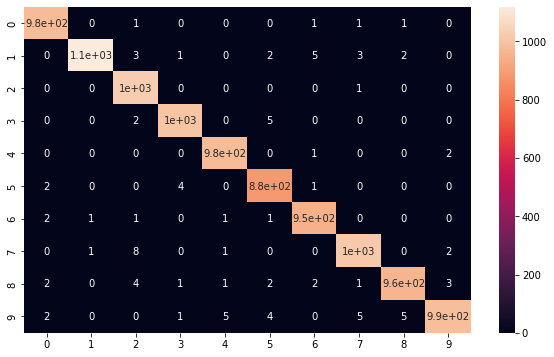

In [84]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

# Saving model for future use

In [90]:
model.save("mnist_cnn_1.h5")

In [91]:
test_model = keras.models.load_model("/content/mnist_cnn_1.h5")

In [93]:
test_model.evaluate(X_test, y_test_cat)

313/313 [==============================] - 5s 15ms/step - loss: 0.0307 - accuracy: 0.9906


[0.03073136880993843, 0.9905999898910522]

# New predictions

## Testing with prepared image

7


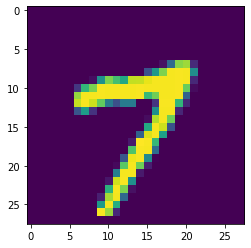

In [96]:
test_number = X_test[5094]
plt.imshow(test_number.reshape(28,28))
print(y_test[5094])

In [102]:
np.argmax(model.predict(test_number.reshape(1,28,28,1), verbose=0))

7

## Predicting imported images

In [112]:
file_path = "/content/3.png"
test_img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

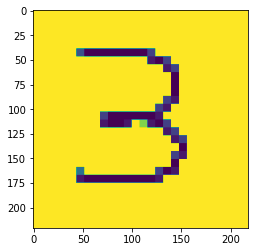

In [107]:
plt.imshow(test_img)

In [108]:
img_r = cv2.resize(test_img, (28,28), interpolation=cv2.INTER_LINEAR)
img_r = cv2.bitwise_not(img_r)

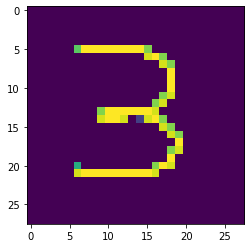

In [109]:
plt.imshow(img_r)

In [110]:
np.argmax(model.predict(img_r.reshape(1,28,28,1), verbose=0))

3

In [134]:
def pred_digit(img_path, background='white'):
  img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  img_r = cv2.resize(img, (28,28), interpolation=cv2.INTER_LINEAR)

  if background == 'white':
    img_r = cv2.bitwise_not(img_r)

  plt.imshow(img_r)
  print("PREDICTION: {}\n".format(np.argmax(model.predict(img_r.reshape(1,28,28,1), verbose=0))))

  return

PREDICTION: 3



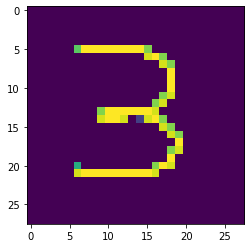

In [120]:
pred_digit(file_path)

# **PREDICTION SPACE**

PREDICTION: 6



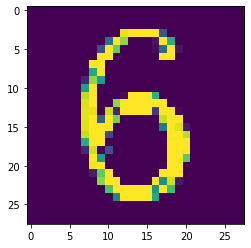

In [135]:
path = '/content/i6.png'
pred_digit(path)

PREDICTION: 2



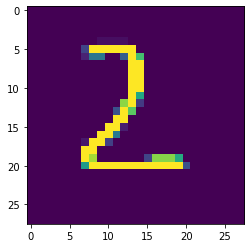

In [136]:
path = '/content/asdasdsa.png'
pred_digit(path)

PREDICTION: 8



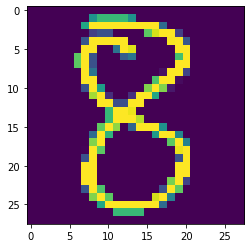

In [137]:
path = '/content/ads.png'
pred_digit(path, background='black')

PREDICTION: 2



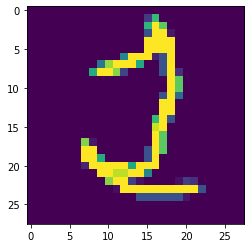

In [138]:
path = '/content/id.png'
pred_digit(path, background='black')